In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures#数据预处理，标准化
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [3]:
## 创建模拟数据
np.random.seed(100)
np.set_printoptions(linewidth=1000, suppress=True)#显示方式设置，每行的字符数用于插入换行符，是否使用科学计数法
N = 10
x = np.linspace(0, 6, N) + np.random.randn(N)
y = 1.8*x**3 + x**2 - 14*x - 7 + np.random.randn(N)
## 将其设置为矩阵  
x.shape = -1, 1
y.shape = -1, 1

In [42]:
## RidgeCV和Ridge的区别是：前者可以进行交叉验证 选参数
models = [
    Pipeline([
            ('Poly', PolynomialFeatures(include_bias=True)), #多项式 阶数
            ('Linear', LinearRegression(fit_intercept=False))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures(include_bias=True)),
            # alpha给定的是Ridge算法中，L2正则项的权重值，也就是ppt中的兰姆达
            # alphas是给定CV交叉验证过程中，Ridge算法的alpha参数值的取值的范围
            ('Linear', RidgeCV(alphas=np.logspace(-1,0,50), fit_intercept=False))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures(include_bias=True)),
            ('Linear', LassoCV(alphas=np.logspace(-1,0,10), fit_intercept=False))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures(include_bias=True)),
            # la_ratio：给定EN算法中L1正则项在整个惩罚项中的比例，这里给定的是一个列表；
            # 表示的是在CV交叉验证的过程中，EN算法L1正则项的权重比例的可选值的范围
            ('Linear', ElasticNetCV(alphas=np.logspace(-1,0,10), l1_ratio=[.1, .5, .7, .9, .95, 1], fit_intercept=False))
        ])
]

1阶，系数为： [-44.14102611  40.05964256]
3阶，系数为： [ -6.80525963 -13.743068     0.93453895   1.79844791]
5阶，系数为： [ -5.60899679 -14.80109301   0.75014858   2.11170671  -0.07724668   0.00566633]
7阶，系数为： [-41.70721173  52.3857053  -29.56451339  -7.6632283   12.07162703  -3.86969096   0.53286096  -0.02725536]
9阶，系数为： [-2465.59961656  6108.67808878 -5112.02742129   974.75679697  1078.90344298  -829.50834855   266.13413444   -45.71773574     4.11585668    -0.15281174]


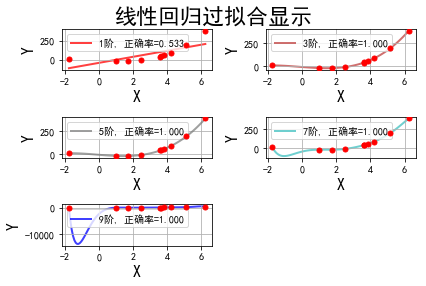

In [25]:
## 线性模型过拟合图形识别
plt.figure(facecolor='w')
degree = np.arange(1,N,2) # 阶
dm = degree.size
colors = [] # 颜色
for c in np.linspace(16711680, 255, dm):
    colors.append('#%06x' % int(c))

model = models[0]
for i,d in enumerate(degree):
    plt.subplot(int(np.ceil(dm/2.0)),2,i+1)
    plt.plot(x, y, 'ro', ms=5, zorder=N) #ms 大小 N 显示第几层？

    # 设置阶数
    model.set_params(Poly__degree=d)
    # 模型训练
    model.fit(x, y.ravel())
    
    lin = model.get_params()['Linear'] #获取模型
    output = u'%d阶，系数为：' %(d)
    print (output, lin.coef_.ravel()) #压缩扁平化
    
    x_hat = np.linspace(x.min(), x.max(), num=100) ## 产生模拟数据
    x_hat.shape = -1,1
    y_hat = model.predict(x_hat) #预测结果
    s = model.score(x, y) #准确率
    
    z = N - 1 if (d == 5) else 0
    label = u'%d阶, 正确率=%.3f' % (d,s)
    plt.plot(x_hat, y_hat, color=colors[i], lw=2, alpha=0.75, label=label, zorder=z)
    
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0,0,1,0.95))
plt.suptitle(u'线性回归过拟合显示', fontsize=22)
plt.show()

线性回归:1阶，系数为： [-44.14102611  40.05964256]
线性回归:3阶，系数为： [ -6.80525963 -13.743068     0.93453895   1.79844791]
线性回归:5阶，系数为： [ -5.60899679 -14.80109301   0.75014858   2.11170671  -0.07724668   0.00566633]
线性回归:7阶，系数为： [-41.70721173  52.3857053  -29.56451339  -7.6632283   12.07162703  -3.86969096   0.53286096  -0.02725536]
线性回归:9阶，系数为： [-2465.59961656  6108.67808878 -5112.02742129   974.75679697  1078.90344298  -829.50834855   266.13413444   -45.71773574     4.11585668    -0.15281174]
Ridge回归:1阶，alpha=1.000000, 系数为： [-32.19510913  37.17064904]
Ridge回归:3阶，alpha=0.100000, 系数为： [ -6.38348449 -13.62304643   0.81888935   1.81242476]
Ridge回归:5阶，alpha=0.100000, 系数为： [ -7.74306481 -12.06777832   0.93090334   1.35749554   0.12759123  -0.01012051]
Ridge回归:7阶，alpha=0.100000, 系数为： [-8.24009173 -6.38220906 -4.51432037  1.2569657   1.66786117 -0.59658961  0.08567484 -0.00445997]
Ridge回归:9阶，alpha=0.100000, 系数为： [-8.2942485  -6.12440177 -3.05924917 -0.52533433  1.76646106 -0.12349432 -0.10363722  0.0201027

Lasso回归:1阶，alpha=1.000000, 系数为： [-40.5253649   39.19430952]
Lasso回归:3阶，alpha=0.100000, 系数为： [ -6.17398625 -13.67105803   0.80114143   1.81586546]
Lasso回归:5阶，alpha=0.599484, 系数为： [ -5.35293339 -12.34534864   0.74234195   1.55951917   0.05338101  -0.00265519]
Lasso回归:7阶，alpha=1.000000, 系数为： [ -2.02926157 -12.00764273  -0.11462575   1.55484238   0.08059303   0.0024935   -0.00041979  -0.00009933]
Lasso回归:9阶，alpha=0.100000, 系数为： [-10.61978756 -11.11852482   2.14412749   0.99927473   0.07432528   0.0058234    0.00019315  -0.0000209   -0.00000739  -0.00000139]


ElasticNet:1阶，alpha=0.599484, l1_ratio=0.100000, 系数为： [-12.60883756  31.89272894]
ElasticNet:3阶，alpha=0.100000, l1_ratio=1.000000, 系数为： [ -6.17398625 -13.67105803   0.80114143   1.81586546]


ElasticNet:5阶，alpha=0.599484, l1_ratio=1.000000, 系数为： [ -5.35293339 -12.34534864   0.74234195   1.55951917   0.05338101  -0.00265519]


ElasticNet:7阶，alpha=1.000000, l1_ratio=1.000000, 系数为： [ -2.02926157 -12.00764273  -0.11462575   1.55484238   0.08059303   0.0024935   -0.00041979  -0.00009933]


ElasticNet:9阶，alpha=0.100000, l1_ratio=0.700000, 系数为： [ -8.06797956 -11.29244892   1.41628545   1.18481766   0.07092798   0.00488549   0.00009357  -0.00002569  -0.00000698  -0.00000121]


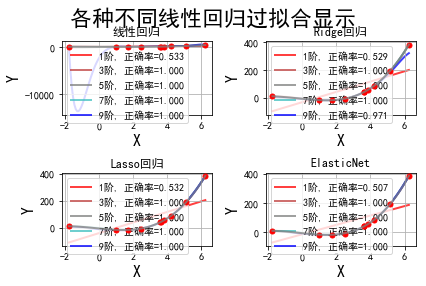

In [43]:
## 线性回归、Lasso回归、Ridge回归、ElasticNet比较
plt.figure(facecolor='w')
degree = np.arange(1,N, 2) # 阶， 多项式扩展允许给定的阶数
dm = degree.size
colors = [] # 颜色
for c in np.linspace(16711680, 255, dm):
    colors.append('#%06x' % int(c))
titles = [u'线性回归', u'Ridge回归', u'Lasso回归', u'ElasticNet']

for t in range(4):
    model = models[t]#选择了模型--具体的pipeline(线性、Lasso、Ridge、EN)
    plt.subplot(2,2,t+1) # 选择具体的子图 2行2列
    plt.plot(x, y, 'ro', ms=5, zorder=N - 1) # 在子图中画原始数据点； zorder：图像显示在第外层

    # 遍历不同的多项式的阶，看不同阶的情况下，模型的效果
    for i,d in enumerate(degree):
        # 设置阶数(多项式)
        model.set_params(Poly__degree=d)
        # 模型训练
        model.fit(x, y.ravel())

        # 获取得到具体的算法模型
        # model.get_params()方法返回的其实是一个dict对象，后面的Linear其实是dict对应的key
        # 也是我们在定义Pipeline的时候给定的一个名称值
        lin = model.get_params()['Linear']
        # 打印数据
        output = u'%s:%d阶，系数为：' % (titles[t],d)
        # 判断lin对象中是否有对应的属性
        if hasattr(lin, 'alpha_'): # 判断lin这个模型中是否有alpha_这个属性
            idx = output.find(u'系数')
            output = output[:idx] + (u'alpha=%.6f, ' % lin.alpha_) + output[idx:]
        if hasattr(lin, 'l1_ratio_'): # 判断lin这个模型中是否有l1_ratio_这个属性
            idx = output.find(u'系数')
            output = output[:idx] + (u'l1_ratio=%.6f, ' % lin.l1_ratio_) + output[idx:]
        # line.coef_：获取线性模型的参数列表，也就是我们ppt中的theta值，ravel()将结果转换为1维数据
        print (output, lin.coef_.ravel())

        # 产生模拟数据
        x_hat = np.linspace(x.min(), x.max(), num=100) ## 产生模拟数据
        x_hat.shape = -1,1
        # 数据预测
        y_hat = model.predict(x_hat)
        # 计算准确率
        s = model.score(x, y)

        # 当d等于5的时候，设置为N-1层，其它设置0层；将d=5的这条线凸显出来
        z = N + 1 if (d == 5) else 0
        label = u'%d阶, 正确率=%.3f' % (d,s)
        plt.plot(x_hat, y_hat, color=colors[i], lw=2, alpha=0.75, label=label, zorder=z)
    
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.title(titles[t])
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
plt.tight_layout(1, rect=(0,0,1,0.95))
plt.suptitle(u'各种不同线性回归过拟合显示', fontsize=22)
plt.show()